In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [250]:
data = pd.read_csv('../data/german_credit_data.csv')

In [153]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [154]:
data.shape

(1000, 10)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   818 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [156]:
cols = ["Saving accounts", "Checking account"]
data[cols]=data[cols].fillna(data.mode().iloc[0])

In [157]:
data.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,786,668,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


<AxesSubplot:xlabel='Age', ylabel='Count'>

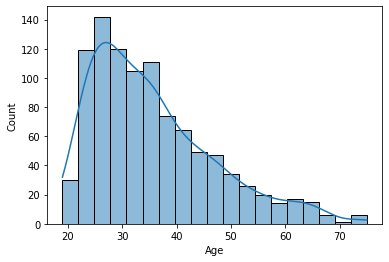

In [158]:
sb.histplot(data['Age'],kde=True)

<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

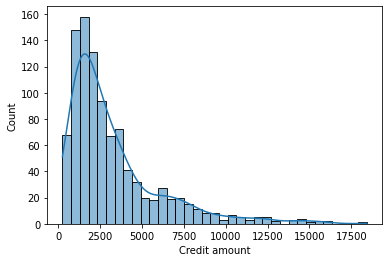

In [159]:
sb.histplot(data['Credit amount'],kde=True)

<AxesSubplot:xlabel='Risk', ylabel='count'>

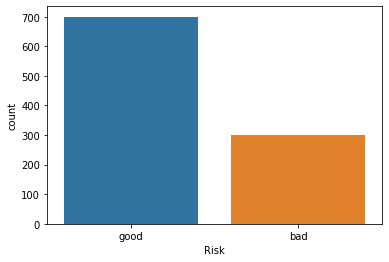

In [184]:
sb.countplot(x=data['Risk'])

In [185]:
data['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [251]:
X= data.drop(['Risk'],axis=1)
y=data['Risk']

In [163]:
obj_list = list(X.select_dtypes(include=['object']).columns)
obj_list

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [164]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [165]:
ct =  ColumnTransformer([('oe',OrdinalEncoder(),obj_list)],remainder='passthrough')

In [166]:
X=ct.fit_transform(X)

In [167]:
X

array([[1.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 1.169e+03,
        6.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 5.951e+03,
        4.800e+01],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+00, 2.096e+03,
        1.200e+01],
       ...,
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 8.040e+02,
        1.200e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 1.845e+03,
        4.500e+01],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 2.000e+00, 4.576e+03,
        4.500e+01]])

In [168]:
le=LabelEncoder()

In [169]:
y=le.fit_transform(y)

In [170]:
y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2,random_state=10)

In [172]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 9), (200, 9), (800,), (200,))

In [186]:
from imblearn.over_sampling import SMOTE

In [187]:
sm = SMOTE(random_state = 10)
X1_res, y1_res = sm.fit_sample(X_train,y_train)

In [188]:
X1_res = np.array(X1_res)
y1_res = np.array(y1_res)

In [268]:
X_train, X_val, y_train, y_val = train_test_split(X1_res,y1_res,test_size=0.2, random_state=10)

In [269]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((611, 9), (153, 9), (611,), (153,))

In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [271]:
#Creating a dictionary of all models
model_dict = {}

model_dict['Logistic regression']= LogisticRegression(solver='liblinear',random_state=10)
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=10)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=10)

In [272]:
#function to print accuracy of all models
def model_test(X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test,y_pred)
    print('======================================{}======================================='.format(model_name))
    print('Score is : {}'.format(accuracy))
    
    print()

In [273]:
for model_name,model in model_dict.items():
    model_test(X_train, X_val, y_train, y_val, model, model_name)

======================================Logistic regression=======================================
Score is : 0.6797385620915033

======================================Decision Tree Classifier=======================================
Score is : 0.6797385620915033

======================================Random Forest Classifier=======================================
Score is : 0.738562091503268



In [274]:
for model_name, model in model_dict.items():
    p = model.predict(X_test)
    print('Testing accuracy of ',model_name,'=',accuracy_score(y_test,p))

Testing accuracy of  Logistic regression = 0.6
Testing accuracy of  Decision Tree Classifier = 0.55
Testing accuracy of  Random Forest Classifier = 0.67


In [275]:
rfc=RandomForestClassifier(random_state=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [276]:
pred_val=rfc.predict(X_val)
pred_test=rfc.predict(X_test)


In [277]:
cm_val = confusion_matrix(y_val,pred_val)
cm_val

array([[50, 21],
       [19, 63]], dtype=int64)

In [278]:
cm_test=confusion_matrix(y_test,pred_test)
cm_test

array([[ 22,  38],
       [ 28, 112]], dtype=int64)

Text(33.0, 0.5, 'Actual')

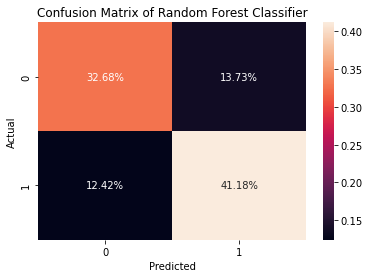

In [300]:
#Plotting confusion matrix
cf_matrix = confusion_matrix(y_val, pred_val)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [280]:
cols=list(X.columns)

In [283]:
d=[[67,'male',2,'own','little','little',1169,6,'radio/TV']]
d1=[[22,'female',2,'own','little','moderate',5951,48,'radio/TV']]
d=pd.DataFrame(d,columns=cols)
d.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV


In [287]:
pred=rfc.predict(ct.transform(d))
pred

array([1])

In [ ]:
import pickle,joblib
pickle.dump(rfc,open('model.pkl','wb'))
joblib.dump(ct,)